# World Happiness Report Prediction

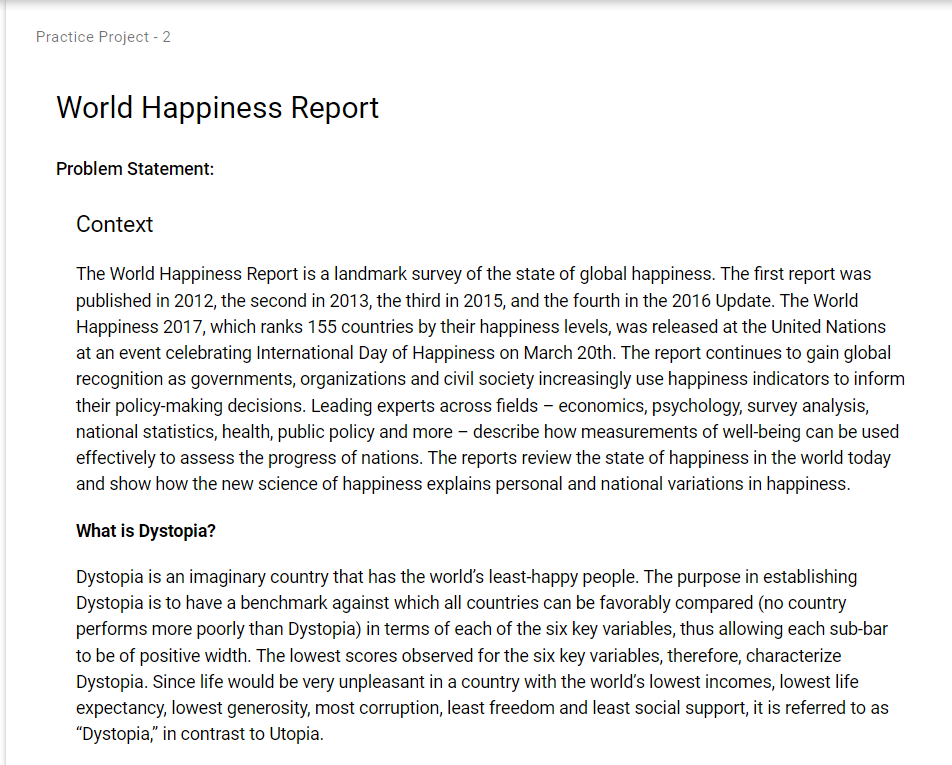

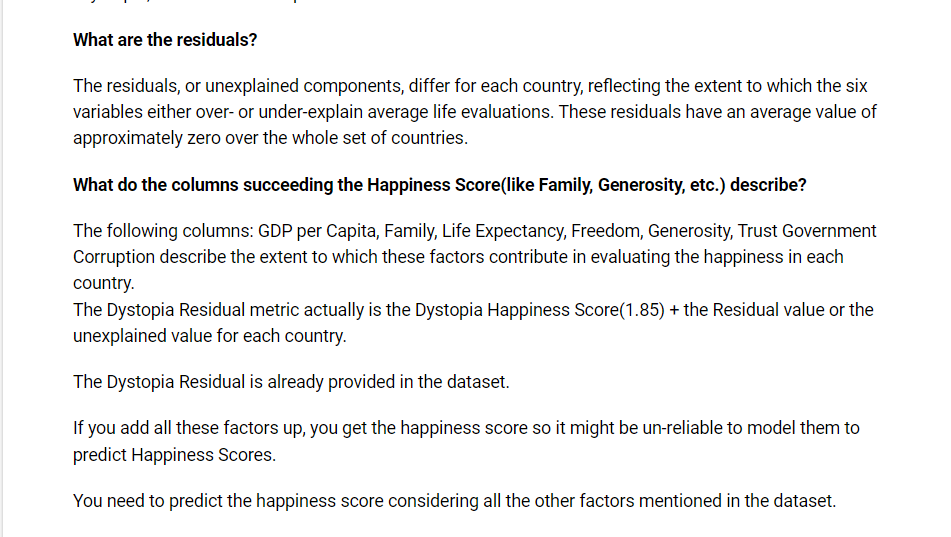

# Importing the Dataset:

In [24]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv("happiness_score_dataset.csv") #reading the data file
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [26]:
df.shape #The Total number of data (same as df)

(158, 12)

In [27]:
df.columns #to see the columns names

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [28]:
df.head() #to see 5 first row of dataset

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Checking for NULL values if any in the data frame

np.nan, None, NaN and others..

In [29]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# Check the datatypes of the columns 

In [30]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

We can observe that the "Total Charges" column has continuous data but it is an object type. Let us handle this column

In [31]:
df['Happiness Score'].unique() # we see there is object data in the float data and nominal data with 158 countries

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [32]:
#Total no. of unique values in Target Variable
df['Happiness Score'].nunique()

157

We notice that the Happiness rank is showing the name of the country as there as 158 values, and Country and Region are nominal data so we can drop them

In [34]:
df=df.drop(['Country', 'Region'],axis=1)

In [35]:
df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# EDA

In [36]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


We notice all values are accounted for

the mean and std of each coloumn are fairly good

we have no outlier in most cases and no data reduntantcy, so moving to visualizing the data

# Visualization of the Data


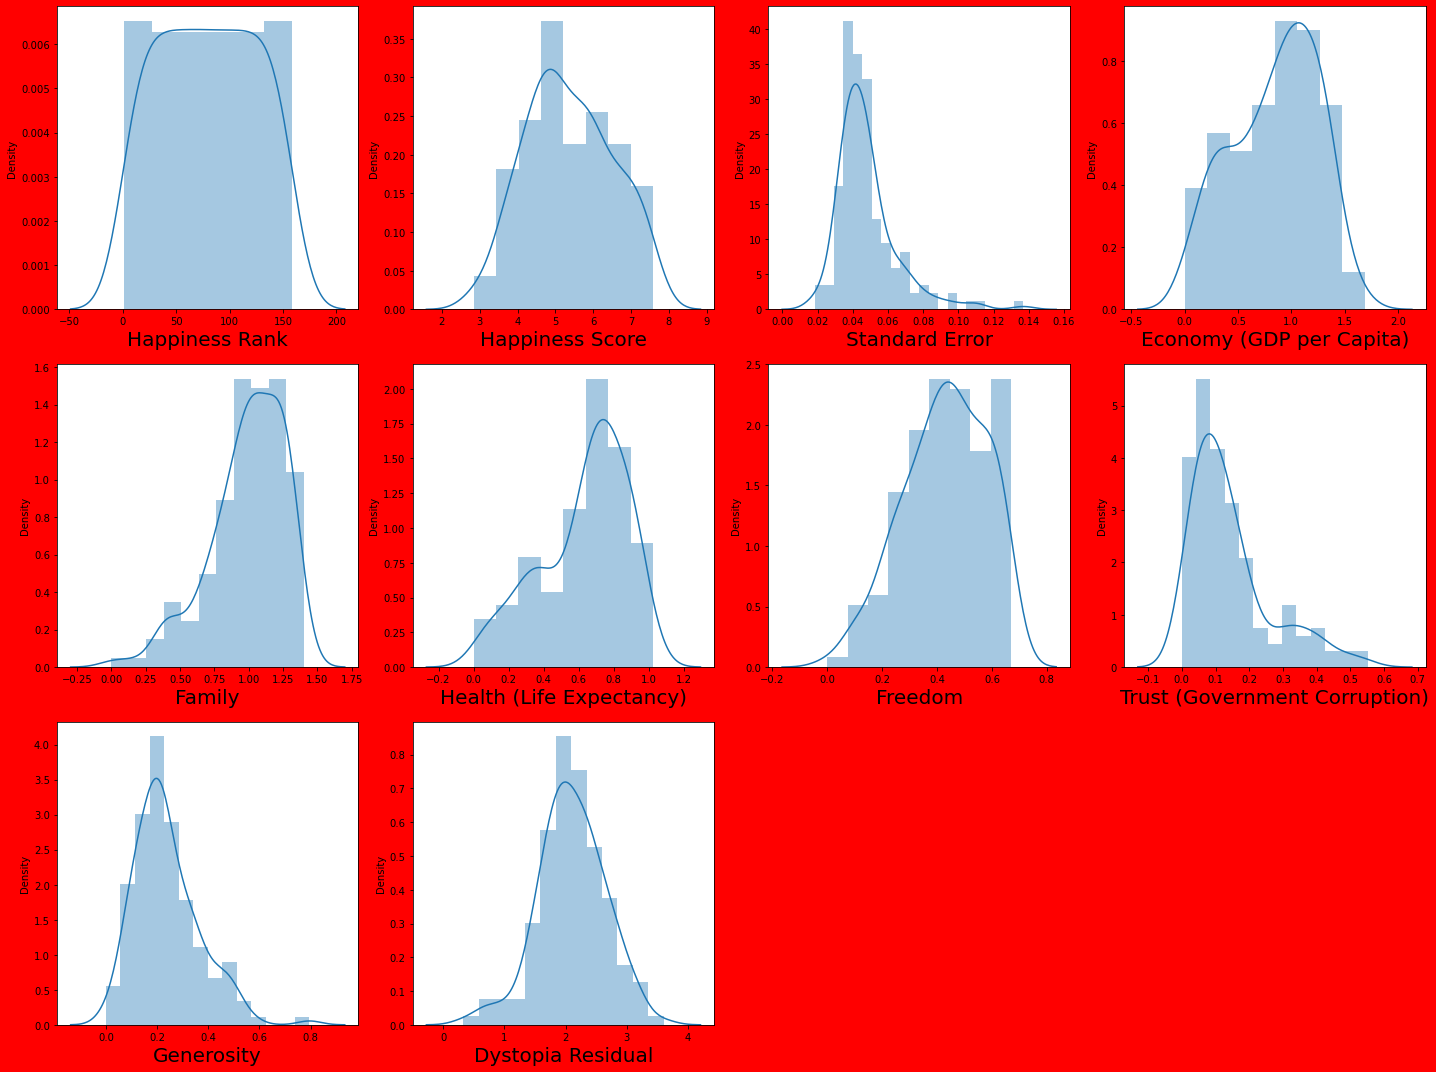

In [37]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize =(20,15), facecolor = 'red')
plotnumber = 1

for column in df:
    if plotnumber <=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

We see some skewness so we will use boxplot to get more idea

# OUTliers Check

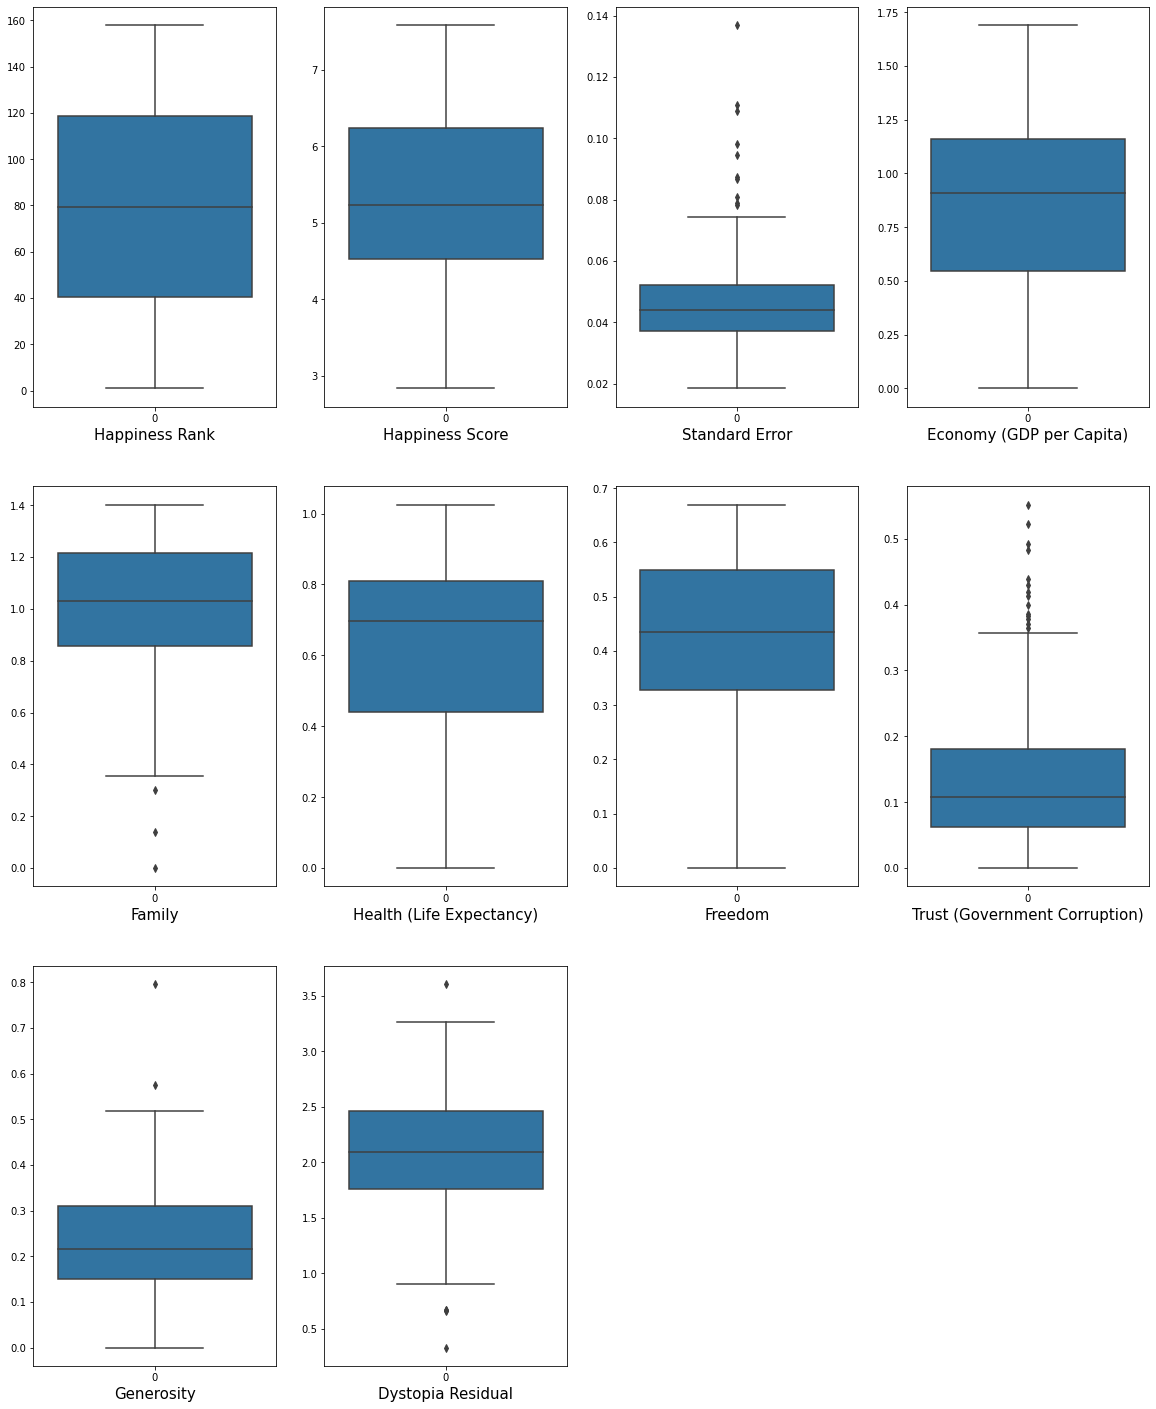

In [38]:
#Lets visualize the data
plt.figure(figsize =(20,25))
graph = 1

for column in df:
    if graph <=12: # as there are 9 columns in data
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

we see that overall the data has many ouliers both on higher and lower ends but as we cannot remove any data due to the small number of data we will move forward with the existing columns

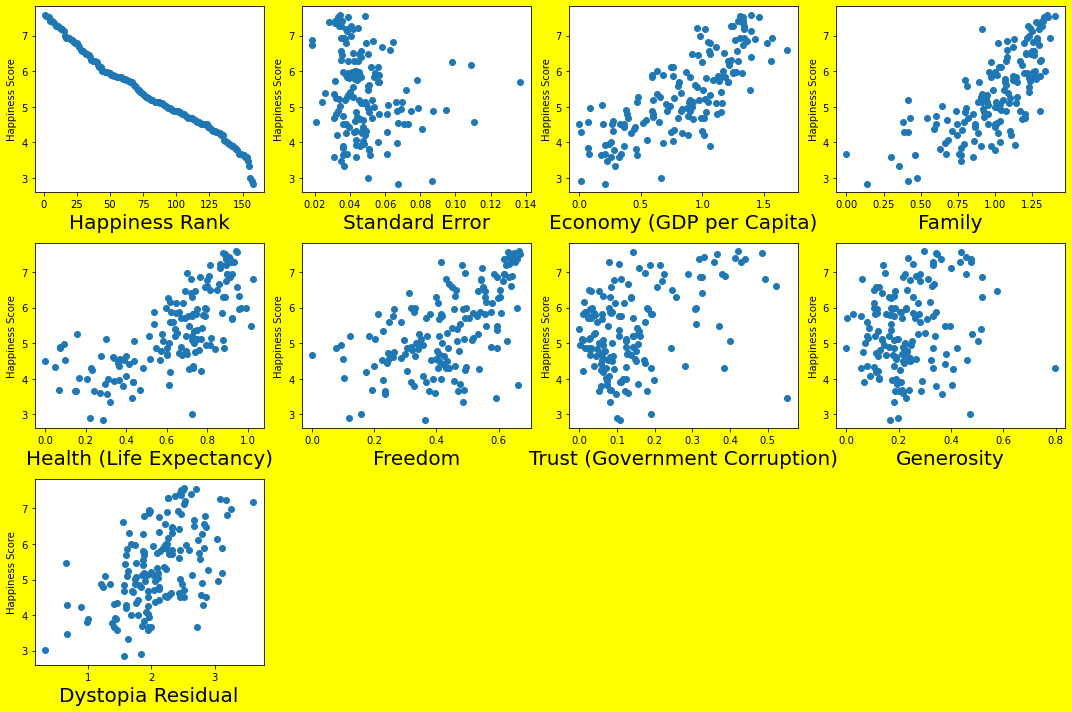

In [40]:
#Lets see how the data is distributed for every column as a whole

#Divide data into features and label

y = df['Happiness Score']
X = df.drop(columns=['Happiness Score'])

#Visualizing Relationship

plt.figure(figsize =(15,10), facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Happiness Score',fontsize = 10)
    plotnumber +=1
plt.tight_layout()



We see some kind of correlation with respect to the target variable with features , so we will now us other techniques to study the realtionship further

## USING CORRELATION AND HEAT MAP TO FURTHER STUDY RELATIONSHIP

<AxesSubplot:>

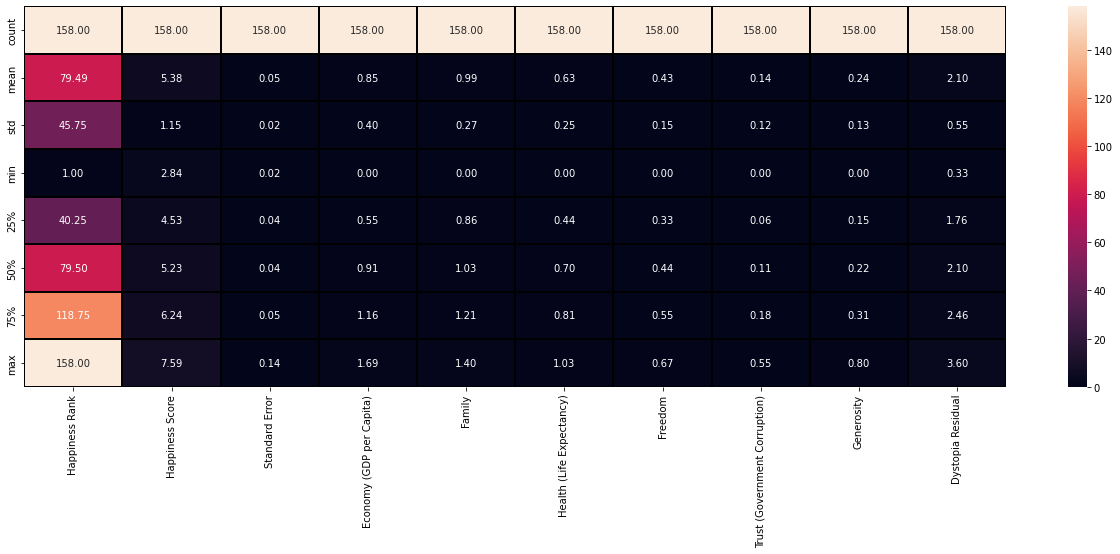

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

# Correlation of the columns with the target Columns

In [42]:
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

we dont see too much variation in the feature-target relationship

<AxesSubplot:>

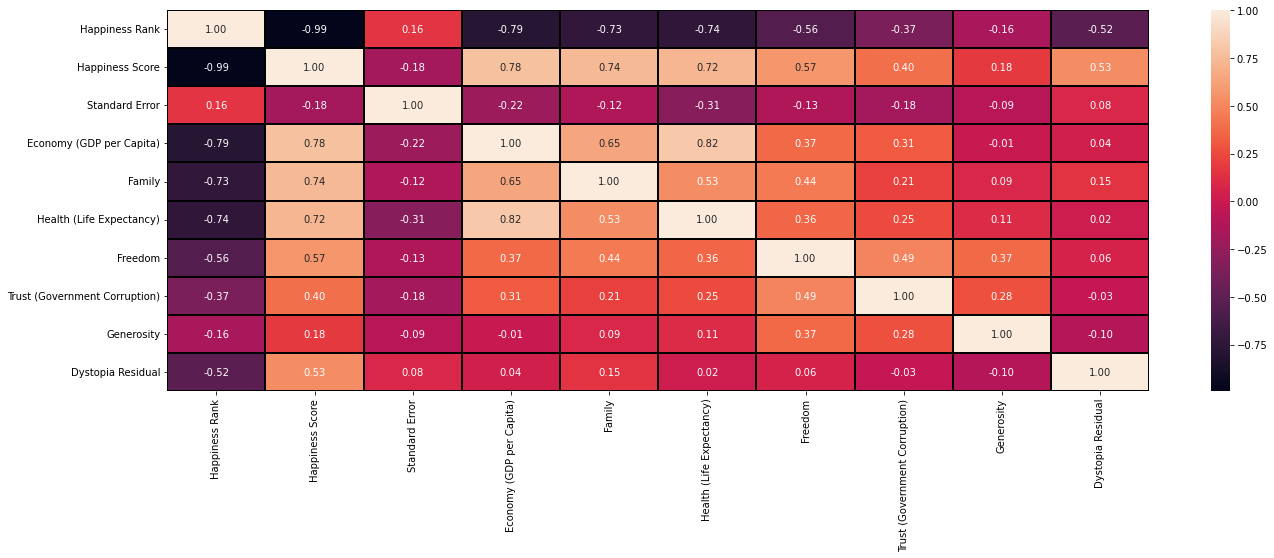

In [43]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

Checking the columns which are positively and negatively correlated with the target columns :

we see that health(Life Expetency) and Economy are 82% correlated , so we can consider these two featues for multi collenearity

but overall as the relation ship with out pput i.e Happiness Score is not significat we wll move further , also need to understand the size of dataset as well

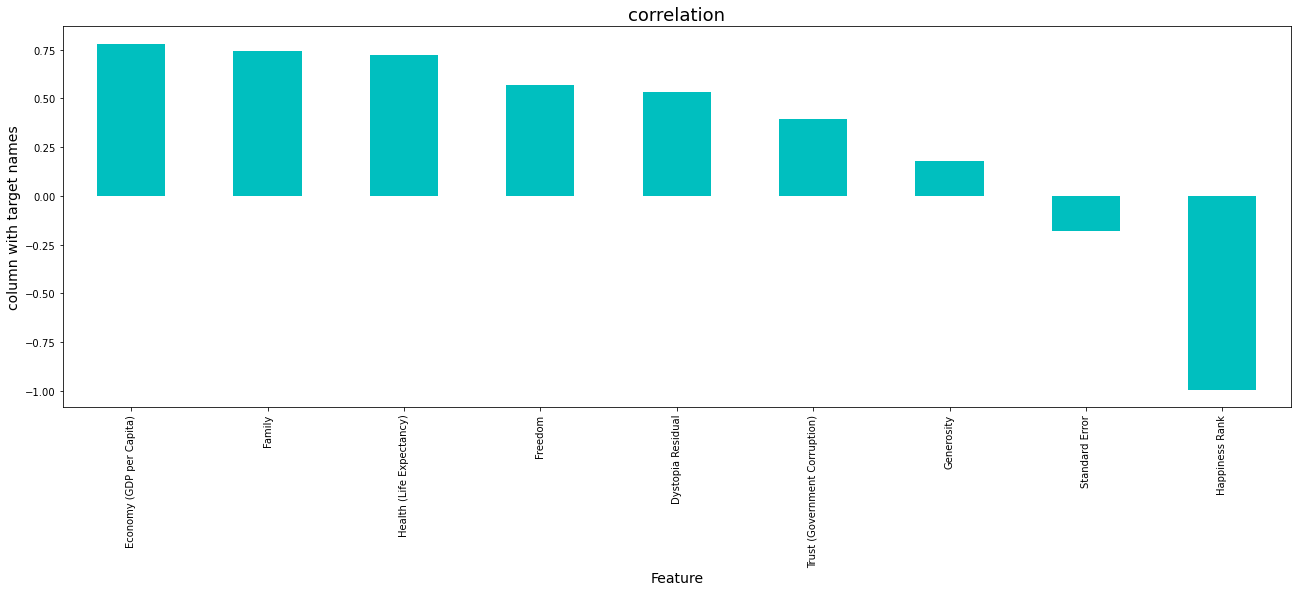

In [44]:
plt.figure(figsize=(22,7))
df.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

From the above study we see that :-
    
   the correlation btw the X any y is not significat to remove any features and dud to small size of data we will not remove   any data
    
    we also see the most features are positvely correalted with atarget  except for Happiness rank
    
    we see that the generosity and Standard Error practically having very less or no relationship with the target variable 

In [45]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Keeping +/0.5 as the range for skewness, here are the columns which do not lie within that range

Standard Error - nominal

Family- nominal

Health (Life Expectancy) -nominal

Trust (Government Corruption)-nominal

Generosity - nominal


Since , we have very few columns and almost 5 columns are have high skewness we will not be able to remove them , as said earlier there are outliers in the data but as the no. of data is very less we will not remove any data and any skewness we will not treat that


# Considering the outlier removal

In [46]:
df.shape

(158, 10)

In [47]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))

In [48]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [49]:
df_new_z.shape

(149, 10)

In [82]:
##Percentage of data loss:

In [50]:
Data_loss = ((158-149)/158)*100

In [51]:
Data_loss

5.69620253164557

# Seperating the Columns into Features and Target

In [52]:
x=df_new_z.drop(['Happiness Score'],axis=1)
y=df_new_z['Happiness Score']

In [53]:
x

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,151,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [54]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

# Scaling the data using Standard Scaler:

# Logistic Regression

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
scalar = StandardScaler()
x_scalar = scalar.fit_transform(x)
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report,r2_score
from sklearn.model_selection import train_test_split

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scalar,y,test_size = 0.25,random_state = 355)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the training accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')

At random state 0,the training accuracy is :-0.999999935170321
At random state 0,the training accuracy is :-0.9999999382489971


At random state 1,the training accuracy is :-0.999999935170321
At random state 1,the training accuracy is :-0.9999999382489971


At random state 2,the training accuracy is :-0.999999935170321
At random state 2,the training accuracy is :-0.9999999382489971


At random state 3,the training accuracy is :-0.999999935170321
At random state 3,the training accuracy is :-0.9999999382489971


At random state 4,the training accuracy is :-0.999999935170321
At random state 4,the training accuracy is :-0.9999999382489971


At random state 5,the training accuracy is :-0.999999935170321
At random state 5,the training accuracy is :-0.9999999382489971


At random state 6,the training accuracy is :-0.999999935170321
At random state 6,the training accuracy is :-0.9999999382489971


At random state 7,the training accuracy is :-0.999999935170321
At random state 7,the training acc

We see that the accuracy of the train and test are almost 100% so we need to chck for overfitting as this score may be biased

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)

In [62]:
lr.fit(x_train,y_train)

LinearRegression()

In [63]:
pred_train = lr.predict(x_train)

In [64]:
print(r2_score(y_test,pred_test))

-0.7426342287409171


So we see a drastic difference between the accuracy and the r2 score so we suspect over ftting in the model

# Cross-Validation of the model

In [65]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and the accuracy for testing is {Test_accuracy}")
    print('\n')

At cross fold2 the cv score is 0.9999996857478912 and accuracy score for training is 0.9999999363718138and the accuracy for testing is -0.7426342287409171


At cross fold3 the cv score is 0.9999994353552529 and accuracy score for training is 0.9999999363718138and the accuracy for testing is -0.7426342287409171


At cross fold4 the cv score is 0.9999986694446412 and accuracy score for training is 0.9999999363718138and the accuracy for testing is -0.7426342287409171


At cross fold5 the cv score is 0.9999981259532401 and accuracy score for training is 0.9999999363718138and the accuracy for testing is -0.7426342287409171


At cross fold6 the cv score is 0.9999971822257302 and accuracy score for training is 0.9999999363718138and the accuracy for testing is -0.7426342287409171


At cross fold7 the cv score is 0.9999952798575672 and accuracy score for training is 0.9999999363718138and the accuracy for testing is -0.7426342287409171


At cross fold8 the cv score is 0.9999949451789062 and accu

We are getting 74% testing accuracy , lets see the overall trend and prediction on a graph

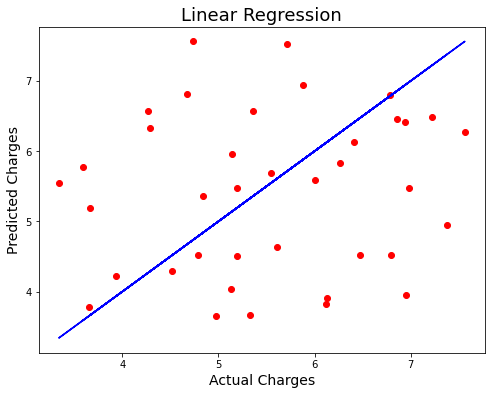

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

We see too many ouliers in the graph but as we have only fewwer data as said before we cannot remove them as it will reduce the effectiveness of the dataset

# Regularization

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [69]:
from sklearn.linear_model import Lasso

parameters ={'alpha' : [.0001, .001, .01, .1, 1, 10],
            'random_state' : list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


# Final model training 

In [70]:
ls = Lasso(alpha= 0.0001, random_state= 0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

99.99737765326432

We are getting a good lasso score of 99.99%

### We are getting very good accuracy with Linear Regression but lets use other algorithms

# Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [85]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 355)
    dt.fit(x_train,y_train)
    pred_train = dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the training accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')

At random state 0,the training accuracy is :-1.0
At random state 0,the training accuracy is :-0.9948505838818194


At random state 1,the training accuracy is :-1.0
At random state 1,the training accuracy is :-0.9683251713398138


At random state 2,the training accuracy is :-1.0
At random state 2,the training accuracy is :-0.9903329768157519


At random state 3,the training accuracy is :-1.0
At random state 3,the training accuracy is :-0.9841550108137399


At random state 4,the training accuracy is :-1.0
At random state 4,the training accuracy is :-0.9685093002004815


At random state 5,the training accuracy is :-1.0
At random state 5,the training accuracy is :-0.9942015198439962


At random state 6,the training accuracy is :-1.0
At random state 6,the training accuracy is :-0.9958610531825383


At random state 7,the training accuracy is :-1.0
At random state 7,the training accuracy is :-0.9917347586452682


At random state 8,the training accuracy is :-1.0
At random state 8,the training 

At random state 98,the training accuracy is :-1.0
At random state 98,the training accuracy is :-0.9723505778745118


At random state 99,the training accuracy is :-1.0
At random state 99,the training accuracy is :-0.9700378937910048




In [86]:
print(r2_score(y_test,pred_test))

0.9700378937910048


### r2 Score has incresed drastically to 97% in Decision tree

# Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

rf.fit(x_train,y_train)

RandomForestRegressor()

In [88]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 355)
    rf.fit(x_train,y_train)
    pred_train = rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the training accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')

At random state 0,the training accuracy is :-0.9990082918169993
At random state 0,the training accuracy is :-0.9985082364726527


At random state 1,the training accuracy is :-0.9992084381600286
At random state 1,the training accuracy is :-0.9984528612152342


At random state 2,the training accuracy is :-0.9991889407800928
At random state 2,the training accuracy is :-0.9981574570219086


At random state 3,the training accuracy is :-0.9991852040256934
At random state 3,the training accuracy is :-0.9985517100520781


At random state 4,the training accuracy is :-0.9991758210043483
At random state 4,the training accuracy is :-0.9983180242202294


At random state 5,the training accuracy is :-0.9993043490372134
At random state 5,the training accuracy is :-0.9980928273047117


At random state 6,the training accuracy is :-0.9993367342869319
At random state 6,the training accuracy is :-0.9981982532364297


At random state 7,the training accuracy is :-0.9992895300414223
At random state 7,the trai

At random state 65,the training accuracy is :-0.9992329470709013
At random state 65,the training accuracy is :-0.9986160375180659


At random state 66,the training accuracy is :-0.9991099582771316
At random state 66,the training accuracy is :-0.998176956998907


At random state 67,the training accuracy is :-0.9993340452564018
At random state 67,the training accuracy is :-0.9979070427146454


At random state 68,the training accuracy is :-0.9990948049699963
At random state 68,the training accuracy is :-0.9986496258668496


At random state 69,the training accuracy is :-0.99926636398052
At random state 69,the training accuracy is :-0.9986352338031879


At random state 70,the training accuracy is :-0.9991798769100656
At random state 70,the training accuracy is :-0.9983153611360964


At random state 71,the training accuracy is :-0.9992739573130951
At random state 71,the training accuracy is :-0.9985064818408135


At random state 72,the training accuracy is :-0.9991792720227787
At random stat

In [89]:
print(r2_score(y_test,pred_test))

0.9986593524981663


### r2 Score has incresed drastically to 99% in Random forest Regressor


# XGboost

In [95]:
import xgboost as xgb
xgb1 = xgb.XGBRegressor()

xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [96]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 355)
    xgb1.fit(x_train,y_train)
    pred_train = xgb1.predict(x_train)
    pred_test=xgb1.predict(x_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the training accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')

At random state 0,the training accuracy is :-0.9999995961803504
At random state 0,the training accuracy is :-0.9931377276028948


At random state 1,the training accuracy is :-0.9999995961803504
At random state 1,the training accuracy is :-0.9931377276028948


At random state 2,the training accuracy is :-0.9999995961803504
At random state 2,the training accuracy is :-0.9931377276028948


At random state 3,the training accuracy is :-0.9999995961803504
At random state 3,the training accuracy is :-0.9931377276028948


At random state 4,the training accuracy is :-0.9999995961803504
At random state 4,the training accuracy is :-0.9931377276028948


At random state 5,the training accuracy is :-0.9999995961803504
At random state 5,the training accuracy is :-0.9931377276028948


At random state 6,the training accuracy is :-0.9999995961803504
At random state 6,the training accuracy is :-0.9931377276028948


At random state 7,the training accuracy is :-0.9999995961803504
At random state 7,the trai

At random state 66,the training accuracy is :-0.9999995961803504
At random state 66,the training accuracy is :-0.9931377276028948


At random state 67,the training accuracy is :-0.9999995961803504
At random state 67,the training accuracy is :-0.9931377276028948


At random state 68,the training accuracy is :-0.9999995961803504
At random state 68,the training accuracy is :-0.9931377276028948


At random state 69,the training accuracy is :-0.9999995961803504
At random state 69,the training accuracy is :-0.9931377276028948


At random state 70,the training accuracy is :-0.9999995961803504
At random state 70,the training accuracy is :-0.9931377276028948


At random state 71,the training accuracy is :-0.9999995961803504
At random state 71,the training accuracy is :-0.9931377276028948


At random state 72,the training accuracy is :-0.9999995961803504
At random state 72,the training accuracy is :-0.9931377276028948


At random state 73,the training accuracy is :-0.9999995961803504
At random s

In [97]:
print(r2_score(y_test,pred_test))

0.9931377276028948


# WE again got the same score on Xgboost so we can assume that Random forest classifier or Xgboost is the best algorithm, we will go with Random forest as Xgboost is better with larger datasets mostly

# Cross-validation of the Model

In [98]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(xgb1,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and the accuracy for testing is {Test_accuracy}")
    print('\n')

At cross fold2 the cv score is -2.4206042741780656 and accuracy score for training is 0.9999995961803504and the accuracy for testing is 0.9931377276028948


At cross fold3 the cv score is -1.5844422168634047 and accuracy score for training is 0.9999995961803504and the accuracy for testing is 0.9931377276028948


At cross fold4 the cv score is -1.5838019870782407 and accuracy score for training is 0.9999995961803504and the accuracy for testing is 0.9931377276028948


At cross fold5 the cv score is -1.3050009678163694 and accuracy score for training is 0.9999995961803504and the accuracy for testing is 0.9931377276028948


At cross fold6 the cv score is -1.37111583547638 and accuracy score for training is 0.9999995961803504and the accuracy for testing is 0.9931377276028948


At cross fold7 the cv score is -1.5185855767918728 and accuracy score for training is 0.9999995961803504and the accuracy for testing is 0.9931377276028948


At cross fold8 the cv score is -1.6889879685592948 and accur

Since the no of folds does not impact the accuracy and cv_score, So we can assume cv=5 is best and selected

Here we have handles the problem of the overfitting and the underfitting by chceking the training and testing score

# Hyper parameter Tuning

In [100]:
from sklearn.model_selection import GridSearchCV

#Creating parameters to pass in GridSearchCV

parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
              'max_depth': [80, 90, 100, 110],
              'max_features': [2, 3, 4 ,5],
              'min_samples_leaf': [3, 4, 5, 6, 7],
              'n_estimators' : [100,200,300,400,500]
             }

GCV = GridSearchCV(estimator =rf,param_grid=parameters,cv=5)
GCV.fit(x_train,y_train) #fitting data into the model
print(GCV.best_params_) #printing the best parameters found by the GridSearchCV

{'criterion': 'mse', 'max_depth': 80, 'max_features': 5, 'min_samples_leaf': 3, 'n_estimators': 200}


In [103]:
rf=RandomForestRegressor(criterion='mse',max_features=5,min_samples_leaf = 3,n_estimators= 200)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision =rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score :',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc =rfscore.mean()
print('Cross Val Score :',rfc*100)

R2 Score : 98.98836477577998
Cross Val Score : -229.67913152953832


In [101]:
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with the best parameters
r2_score(y_test,GCV_pred) #Checking Final Accuracy

0.989202252855614

We are getting model Accuracy and cross-validation both as 98.9% which shows our model is performing moderately lesser than the earlier score

we are getting a very extreme cross val score of 229 , which is highly overfitted , but as the datat is very small for us to remove any rows further , we will not do so 

In [105]:
import pickle
filename = 'Happiness.pkl'
pickle.dump(GCV,open(filename,'wb'))

# Conclusion

In [106]:
loaded_model = pickle.load(open('HAppiness.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

98.9202252855614


In [107]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Orignal'])

In [108]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
Predicted,4.218745,5.802617,5.831627,5.332006,5.158127,4.185697,5.578512,4.010130,4.447976,4.558598,...,6.529884,5.676439,6.346395,4.087572,7.290305,6.056390,4.540844,5.373747,4.669845,6.027707
Orignal,4.184811,5.795341,5.865014,5.292297,5.164019,4.224806,5.599753,4.000895,4.455905,4.556942,...,6.497617,5.679044,6.348363,4.078317,7.268506,6.046487,4.525787,5.395050,4.632176,6.012308
